# Ex2: Titanic Disaster


This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)

Dataset attributes:

|Attribute|Definition|Key|
|--------|----------|----------|
|survival|Survival|	0 = No, 1 = Yes|
|pclass|Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation||C = Cherbourg, Q = Queenstown, S = Southampton|


**Attribute notes**:

- pclass: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower


- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5


- sibsp: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)


- parch: The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

---
## Understand the dataset:

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Step 2. Import the dataset

> The dataset is divided in two parts (titanic_train and titanic_test), import both.

In [2]:
train = pd.read_csv('./datasets/titanic_train.csv')
test = pd.read_csv('./datasets/titanic_test.csv')

In [3]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Step 3. You should have a problem at this point, look into the datasets folder

In [7]:
test_labels = pd.read_csv('./datasets/titanic_test_labels.csv')

In [8]:
test_labels.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
test_labels.shape

(418, 2)

### Step 4. Join the missing labels

In [10]:
test = test.merge(test_labels, on='PassengerId')
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


### Step 5. Merge the datasets

In [11]:
ds = pd.concat([train, test], axis=0, ignore_index=True)
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
ds.shape

(1309, 12)

### Step 4. Explore and prepare the dataset

> **Hint**: we saw together a template. =D

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [14]:
ds.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Missing values

In [15]:
#ds.isna()

ds.isna().any(0)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

In [16]:
# How many missing values (aka Nan)?
ds.isna()[['Age', 'Fare', 'Cabin', 'Embarked']].sum(0)

Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [17]:
# 1. Drop those rows where we have the cells for the columns with few missing values
#help(ds.dropna)
ds.dropna(axis=0, subset=['Fare', 'Embarked'], inplace=True)

In [18]:
# How many missing values (aka NaN)?
ds.isna()[['Age', 'Fare', 'Cabin', 'Embarked']].sum(0)

Age          263
Fare           0
Cabin       1013
Embarked       0
dtype: int64

In [19]:
# Save the age for plotting afterwards
Age = ds.Age

In [20]:
# 2. Drop the columns that contain too much missing values
ds.drop(['Age', 'Cabin'], axis=1, inplace=True)

In [21]:
ds.shape

(1306, 10)

#### Check duplicates

In [22]:
#help(ds.duplicated)
print(f'Number of duplicated rows: {ds.duplicated().sum()}')

Number of duplicated rows: 0


> **Note**: in the dataset we have unique attributes (like PassangerId), we will never find duplicated rows if we do not exclude that attributes.

In [23]:
for c in ds.columns:
    print(c, ds[c].is_unique)

PassengerId True
Survived False
Pclass False
Name False
Sex False
SibSp False
Parch False
Ticket False
Fare False
Embarked False


In [24]:
ds

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,S


In [25]:
# We also decide to exclude the Name, it is not unique but we don't wanna account it in the duplicates
print(f"Number of duplicated rows: {ds.drop(['PassengerId', 'Name'], axis=1).duplicated().sum()}")

Number of duplicated rows: 124


In [26]:
tmp = ds[ds.drop(['PassengerId', 'Name'], axis=1).duplicated(keep=False)]
print_limit = 10

for k, g in tmp.groupby(['Survived', 'Pclass', 'Sex', 'Ticket', 'Fare', 'Embarked']):
    print(g.values, '\n')
    print_limit -= 1
    if not print_limit:
        break

[[298 0 1 'Allison, Miss. Helen Loraine' 'female' 1 2 '113781' 151.55 'S']
 [499 0 1 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)' 'female' 1 2
  '113781' 151.55 'S']] 

[[111 0 1 'Porter, Mr. Walter Chamberlain' 'male' 0 0 '110465' 52.0 'S']
 [476 0 1 'Clifford, Mr. George Quincy' 'male' 0 0 '110465' 52.0 'S']] 

[[816 0 1 'Fry, Mr. Richard' 'male' 0 0 '112058' 0.0 'S']
 [1264 0 1 'Ismay, Mr. Joseph Bruce' 'male' 0 0 '112058' 0.0 'S']] 

[[84 0 1 'Carrau, Mr. Francisco M' 'male' 0 0 '113059' 47.1 'S']
 [1295 0 1 'Carrau, Mr. Jose Pedro' 'male' 0 0 '113059' 47.1 'S']] 

[[603 0 1 'Harrington, Mr. Charles H' 'male' 0 0 '113796' 42.4 'S']
 [959 0 1 'Moore, Mr. Clarence Bloomfield' 'male' 0 0 '113796' 42.4 'S']] 

[[1010 0 1 'Beattie, Mr. Thomson' 'male' 0 0 '13050' 75.2417 'C']
 [1162 0 1 'McCaffry, Mr. Thomas Francis' 'male' 0 0 '13050' 75.2417 'C']] 

[[7 0 1 'McCarthy, Mr. Timothy J' 'male' 0 0 '17463' 51.8625 'S']
 [1038 0 1 'Hilliard, Mr. Herbert Henry' 'male' 0 0 '17463' 51.862

> **We found many duplicated rows**. However, after taking a closer look at the duplicated rows, we don't see any problem in having them. The reason behind such duplicated rows is the presence of Parch and SibSp attributes (see attribute description). In a real-life analysis we should carefully treat this inconsistency to imporve the quality of the data!

---
## Visualization
### Step 1. Create a pie chart presenting the male/female proportion

In [27]:
titanic = ds

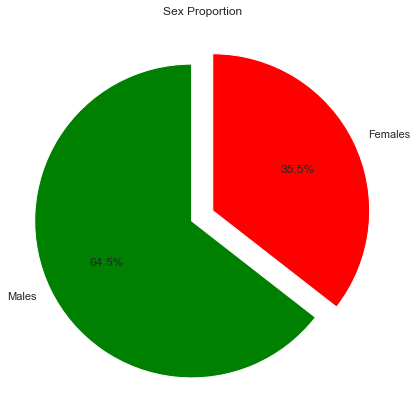

In [28]:
# sum the instances of males and females
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

plt.figure(figsize=(6, 6))
# Create a pie chart
plt.pie(
    [males, females],
    labels = ['Males', 'Females'],
    colors = ['green','red'],
    # with one slide exploded out
    explode = (0.15 , 0),
    # with the start angle at 90%
    startangle = 90,
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
)

plt.axis('equal')
plt.title("Sex Proportion")
plt.tight_layout()
plt.show()

### Step 2. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

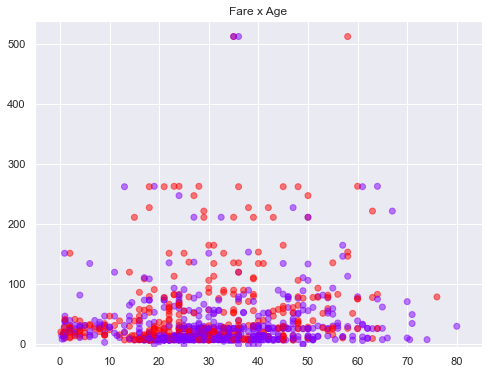

In [29]:
# Better to stick with matplotlib

# Find the rows where Age is not Nan
mask = ~Age.isna()

plt.figure(figsize=(8, 6))

plt.scatter(
    x=Age[mask], 
    y=titanic.loc[mask, 'Fare'], 
    c=pd.factorize(titanic.loc[mask, 'Sex'])[0],
    cmap='rainbow',
    alpha=0.5
)

plt.ylim(-5,)
plt.xlim(-5, 85)

plt.title('Fare x Age')
plt.show()

### Step 3. How many people survived?

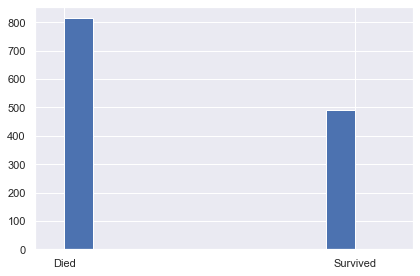

In [30]:
plt.figure()

plt.hist(titanic.Survived)

plt.xticks([0, 1],  ['Died', 'Survived'])
plt.xlim([-0.1, 1.2])
plt.tight_layout()
plt.show()

### Step 4. Create a histogram with the Fare payed

In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1306 non-null   int64  
 1   Survived     1306 non-null   int64  
 2   Pclass       1306 non-null   int64  
 3   Name         1306 non-null   object 
 4   Sex          1306 non-null   object 
 5   SibSp        1306 non-null   int64  
 6   Parch        1306 non-null   int64  
 7   Ticket       1306 non-null   object 
 8   Fare         1306 non-null   float64
 9   Embarked     1306 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 112.2+ KB


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490]


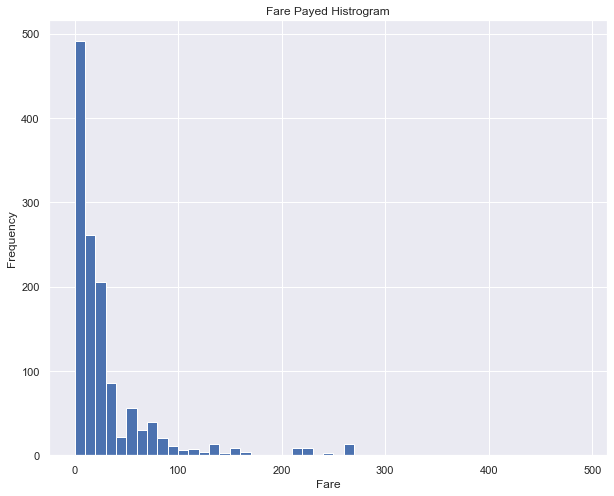

In [32]:
# create bins interval using numpy
binsVal = list(range(0, 500, 10))
print(binsVal)

plt.figure(figsize=(10, 8))
# create the plot
plt.hist(
    titanic.Fare.sort_values(ascending = False), 
    bins = binsVal
)

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

# show the plot
plt.show()

### BONUS: Create other plots to better visualize the dataset

#### How does the Fare attribute change for female and male?

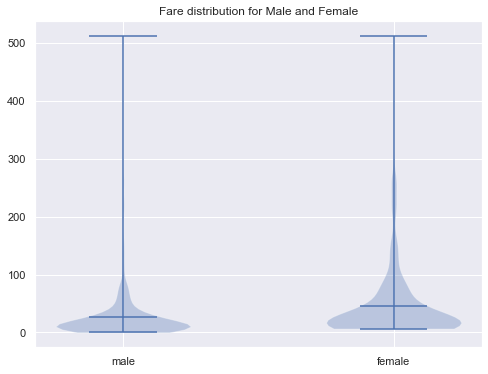

In [33]:
plt.figure(figsize=(8, 6))
plt.violinplot([
    titanic.loc[titanic.Sex == 'male', 'Fare'], 
    titanic.loc[titanic.Sex == 'female', 'Fare']
], showmeans=True)

plt.xticks([1, 2], ['male', 'female'])
plt.title('Fare distribution for Male and Female')
plt.show()

---
## Machine Learning: clustering

https://scikit-learn.org/stable/modules/clustering.html

### Step 1. Is the dataset ready for ML?

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1306 non-null   int64  
 1   Survived     1306 non-null   int64  
 2   Pclass       1306 non-null   int64  
 3   Name         1306 non-null   object 
 4   Sex          1306 non-null   object 
 5   SibSp        1306 non-null   int64  
 6   Parch        1306 non-null   int64  
 7   Ticket       1306 non-null   object 
 8   Fare         1306 non-null   float64
 9   Embarked     1306 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 112.2+ KB


#### What to do with the features?

In [35]:
for c in titanic.columns:
    print(f'Caridinality of {c:11} = {titanic[c].nunique()}')

Caridinality of PassengerId = 1306
Caridinality of Survived    = 2
Caridinality of Pclass      = 3
Caridinality of Name        = 1304
Caridinality of Sex         = 2
Caridinality of SibSp       = 7
Caridinality of Parch       = 8
Caridinality of Ticket      = 927
Caridinality of Fare        = 280
Caridinality of Embarked    = 3


Decision for each attribute:

- **PassengerId**: Not useful (it is a unique attribute), drop it.
- **Survived**: Nothing to do, we keep it.
- **Pclass**: Nothing to do, we keep it.
- **Name**: Not useful (although not unique, too many values), drop it.
- **Sex**: Useful but categorical, one-hot encode it.
- **SibSp**: Nothing to do, we keep it.
- **Parch**: Nothing to do, we keep it.
- **Ticket**: Not useful (too many values to one-hot encode), drop it.
- **Fare**: Nothing to do, we keep it.
- **Embarked**: Useful but categorical, one-hot encode.

In [36]:
# Drop the useless attributes
df = titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [37]:
df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked'])
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,0,1,0,0,1
1,1,1,1,0,71.2833,1,0,1,0,0
2,1,3,0,0,7.9250,1,0,0,0,1
3,1,1,1,0,53.1000,1,0,0,0,1
4,0,3,0,0,8.0500,0,1,0,0,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    1306 non-null   int64  
 1   Pclass      1306 non-null   int64  
 2   SibSp       1306 non-null   int64  
 3   Parch       1306 non-null   int64  
 4   Fare        1306 non-null   float64
 5   Sex_female  1306 non-null   uint8  
 6   Sex_male    1306 non-null   uint8  
 7   Embarked_C  1306 non-null   uint8  
 8   Embarked_Q  1306 non-null   uint8  
 9   Embarked_S  1306 non-null   uint8  
dtypes: float64(1), int64(4), uint8(5)
memory usage: 67.6 KB


In [39]:
# Best practice
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    1306 non-null   float64
 1   Pclass      1306 non-null   float64
 2   SibSp       1306 non-null   float64
 3   Parch       1306 non-null   float64
 4   Fare        1306 non-null   float64
 5   Sex_female  1306 non-null   float64
 6   Sex_male    1306 non-null   float64
 7   Embarked_C  1306 non-null   float64
 8   Embarked_Q  1306 non-null   float64
 9   Embarked_S  1306 non-null   float64
dtypes: float64(10)
memory usage: 112.2 KB


#### Scaling 

We need to scale the data to avoid a bias in PCA.

In [40]:
df.describe()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000
mean,0.376723,2.296325,0.50000,0.385911,33.223956,0.355283,0.644717,0.206738,0.094181,0.699081
std,0.484750,0.837037,1.04258,0.866357,51.765986,0.478782,0.478782,0.405121,0.292192,0.458833
min,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.00000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.00000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.00000,0.000000,31.275000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,8.00000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(df)

In [42]:
list(zip(df.columns, data.mean(axis=0)))

[('Survived', 2.7203014385915015e-17),
 ('Pclass', 0.0),
 ('SibSp', 5.440602877183003e-18),
 ('Parch', 5.882651860954122e-17),
 ('Fare', -2.7203014385915016e-18),
 ('Sex_female', 3.128346654380227e-17),
 ('Sex_male', -3.128346654380227e-17),
 ('Embarked_C', 1.904211007014051e-17),
 ('Embarked_Q', -8.160904315774505e-18),
 ('Embarked_S', 3.808422014028102e-17)]

In [43]:
list(zip(df.columns, data.std(axis=0)))

[('Survived', 0.9999999999999999),
 ('Pclass', 1.0),
 ('SibSp', 0.9999999999999999),
 ('Parch', 1.0),
 ('Fare', 0.9999999999999999),
 ('Sex_female', 1.0),
 ('Sex_male', 1.0),
 ('Embarked_C', 1.0),
 ('Embarked_Q', 0.9999999999999998),
 ('Embarked_S', 1.0)]

#### Dataset visualization:

**t-SNE**:

In [44]:
from sklearn.manifold import TSNE

projected = TSNE(n_components=2, perplexity=50, n_iter=1000).fit_transform(data)

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


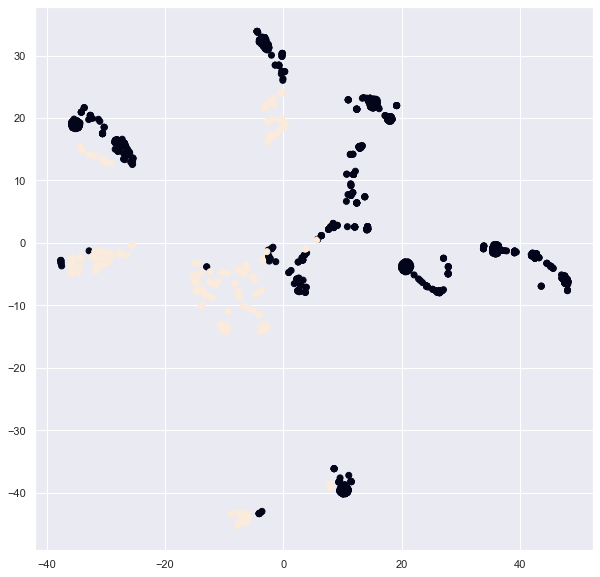

In [45]:
plt.figure(figsize=(10, 10))

plt.scatter(projected[:, 0], 
            projected[:, 1],
            c=df.Survived)

plt.show()

**PCA**:

1. Find the principal components without reducing the dimensionality of the dataset.

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=df.shape[1])
pca.fit(data)

PCA(n_components=10)

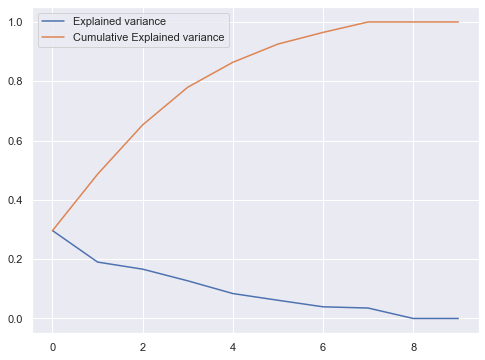

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(pca.explained_variance_ratio_, label='Explained variance')
plt.plot(pca.explained_variance_ratio_.cumsum(), label='Cumulative Explained variance')
plt.legend()
plt.show()

2. Use PCA to plot the dataset. We are going to use the first two principal components.

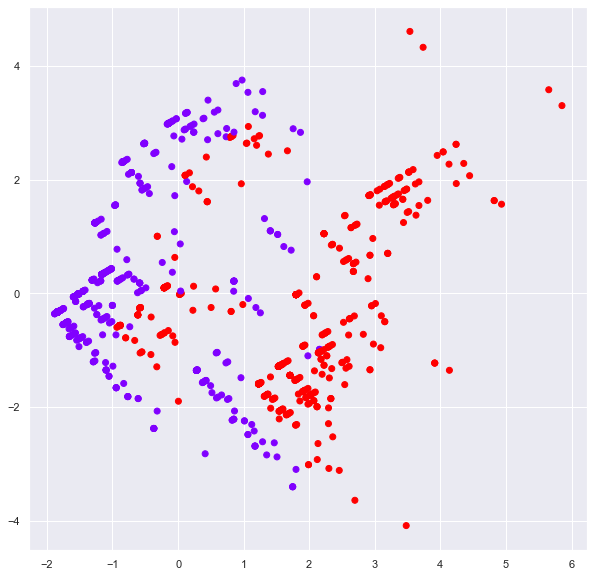

In [53]:
projected = PCA(n_components=2).fit_transform(data)

plt.figure(figsize=(10, 10))
plt.scatter(projected[:, 0], 
            projected[:, 1],
            c=df.Survived,
            cmap='rainbow')
plt.show()

3. We see from the PCA analysis above that the last two components are useless (do not partecipate in explaining the dataset variance). We could drop them by transforming the dataset with:

In [ ]:
#data = PCA(n_components=8).fit_transform(data)

### Step 2. Cluster the dataset with K-Means and visualize.

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(n_clusters=2)

In [55]:
kmeans.labels_

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

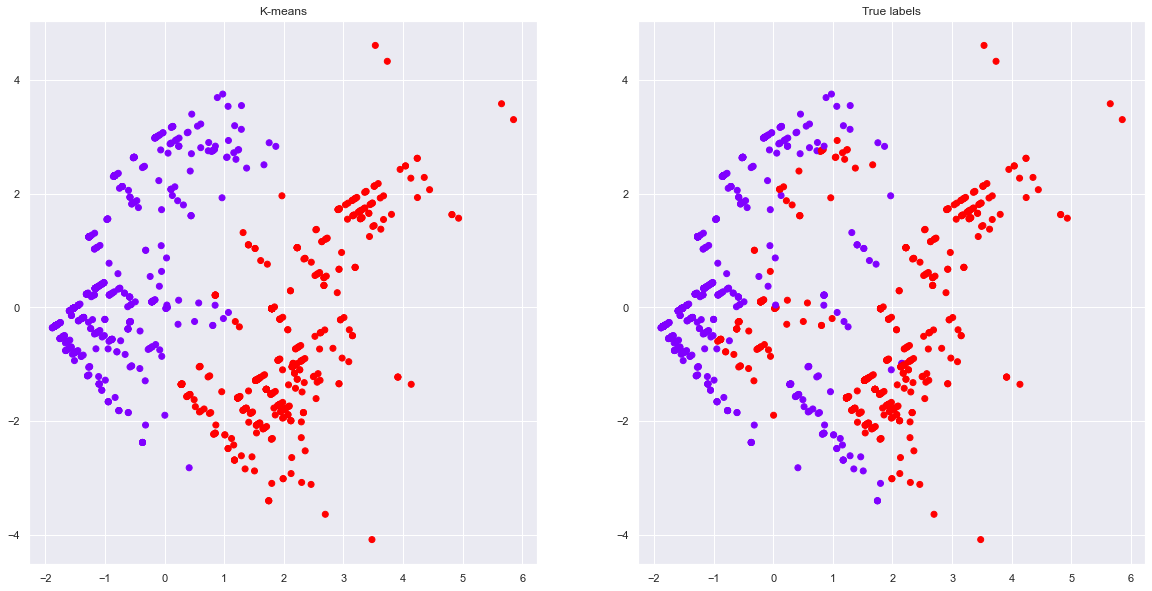

In [56]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.scatter(projected[:, 0], 
            projected[:, 1],
            c=kmeans.labels_,
            cmap='rainbow')
plt.title('K-means')

plt.subplot(122)
plt.scatter(projected[:, 0], 
            projected[:, 1],
            c=df.Survived,
            cmap='rainbow')
plt.title('True labels')

plt.show()

### Step 3. Cluster with Agglomerative and visualize the dendogram.
> **Hint**: look how to do it in the sklearn community.

In [57]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [63]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, 
                                linkage='ward',
                                n_clusters=None)
model = model.fit(data)

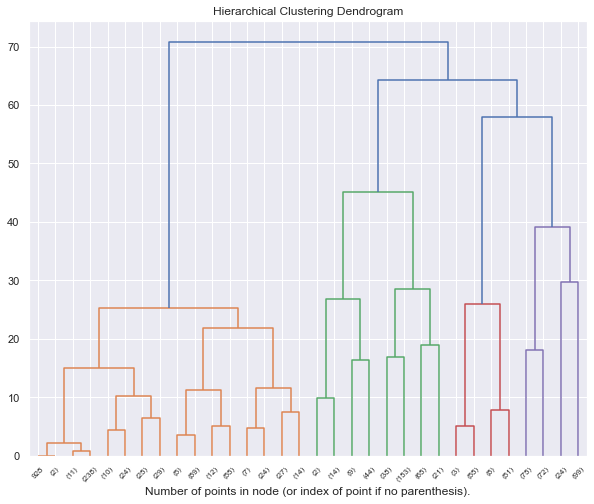

In [64]:
plt.figure(figsize=(10, 8))

# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.title("Hierarchical Clustering Dendrogram")
plt.show()

> As you can see, it is not simple to understand something about the Agglomerative hierarchy when we have a lot of data.


In [66]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=2,
                                linkage='ward')
model = model.fit(data)

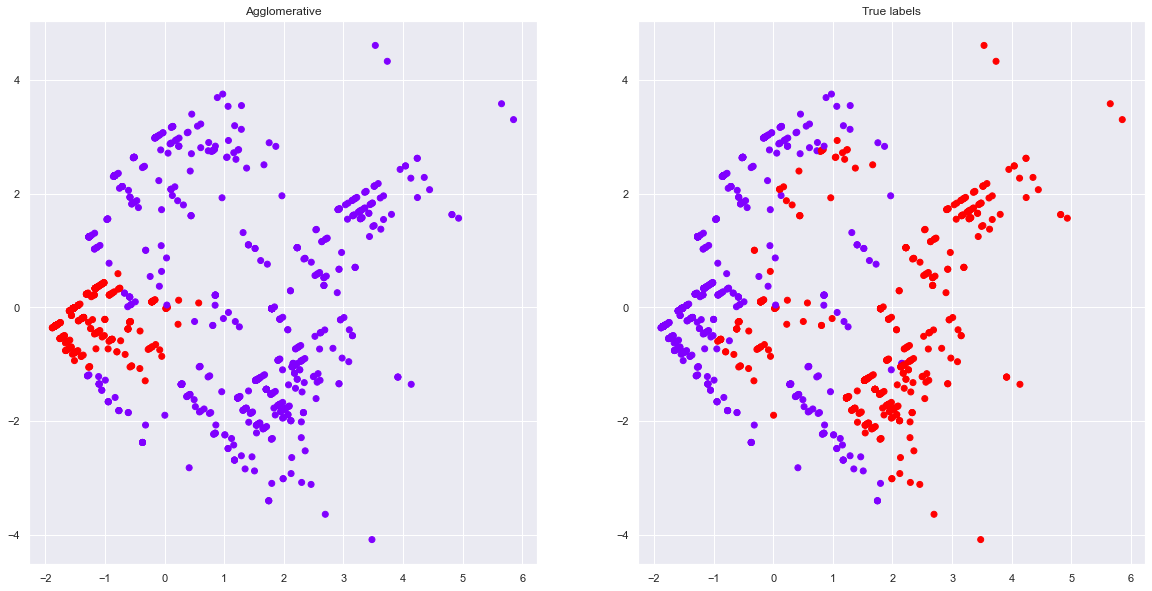

In [68]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.scatter(projected[:, 0], 
            projected[:, 1],
            c=model.labels_,
            cmap='rainbow')
plt.title('Agglomerative')

plt.subplot(122)
plt.scatter(projected[:, 0], 
            projected[:, 1],
            c=df.Survived,
            cmap='rainbow')
plt.title('True labels')

plt.show()

### Step 4. Cluster with Spectral clustering.

> Read about spectral clustering!

In [91]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=2, 
                              n_components=4, 
                              affinity='nearest_neighbors',
                              n_neighbors=25)
spectral.fit(data)

SpectralClustering(affinity='nearest_neighbors', n_clusters=2, n_components=4,
                   n_neighbors=25)

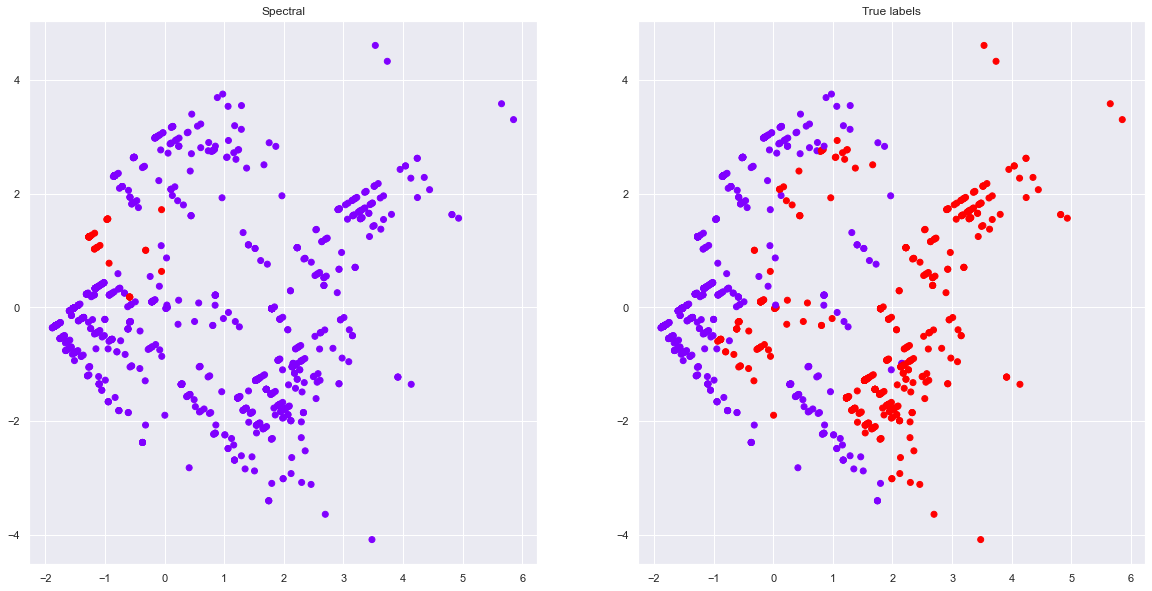

In [92]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.scatter(projected[:, 0], 
            projected[:, 1],
            c=spectral.labels_,
            cmap='rainbow')
plt.title('Spectral')

plt.subplot(122)
plt.scatter(projected[:, 0], 
            projected[:, 1],
            c=df.Survived,
            cmap='rainbow')
plt.title('True labels')

plt.show()

### Step 5. Which algorithm is the best?

### Step 6. Is clustering sufficent for predicting the dataset labels (survived attribute)?
> Answer with a plot

### Step 7. Do exist clustering algorithms that can be fitted on a training set and used against a testing set?
> If any, try them out.